In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import tensorflow as tf
import os
import numpy as np
import PIL
import cv2

from PIL import Image
from glob import glob

In [4]:
root = 'train/'
training_images = []
training_labels = []

for filename in glob(root +"*"):
    for img in glob(filename + "/*.png"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (30,30))
        training_images.append(img_resize)
        label = filename.split('/')[1]
        training_labels.append(label)
  
training_images = np.array(training_images)
training_labels = np.array(training_labels)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(39209, 30, 30, 3)
(39209, 1)


In [5]:
root2 = 'test/'
test_images = []
test_idx = []

flist = sorted(glob(root2 + '*.png'))

for filename in flist:
    an_img = PIL.Image.open(filename)
    img_array = np.array(an_img)
    img_resize = cv2.resize(img_array, (30,30))
    test_images.append(img_resize)
    label = filename.split('/')[1] 
    test_idx.append(label)
    
test_images = np.array(test_images)

print(test_images.shape)
print(test_idx[0:5])

(12630, 30, 30, 3)
['00000.png', '00001.png', '00002.png', '00003.png', '00004.png']


[0],[1],[1],[2],[2],[3],[3],[4],[4],[5],[5],[6],[7],[8],[9],[10],[12],[12],[12],[14],[17],[18],[19],[21],[23],[23],[25],[27],[28],[29],[31],[32],[32],[34],[34],[35],[38],[38],[39],[40],

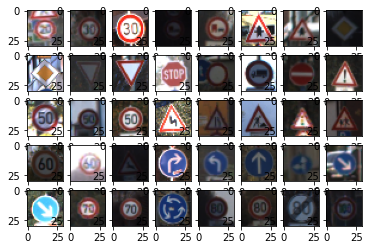

In [6]:
import matplotlib.pyplot as plt

for i in range(40):
    plt.subplot(5, 8, i + 1)
    plt.imshow(training_images[i*911])
    print(training_labels[i*911], end=",")
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.3, random_state=42)
X_test = test_images

In [8]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
X_test = X_test / 255.0

In [9]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)

(27446, 30, 30, 3)
(11763, 30, 30, 3)
(27446, 1)
(11763, 1)
(12630, 30, 30, 3)


In [15]:
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_valid = tf.keras.utils.to_categorical(y_valid, 43)

In [16]:
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)
print(X_test.shape)

(27446, 30, 30, 3)
(11763, 30, 30, 3)
(27446, 43)
(11763, 43)
(12630, 30, 30, 3)


In [17]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30, 30, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(43, activation='softmax')
])

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
model1 = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 40, batch_size = 16, verbose = 2)

Epoch 1/40
1716/1716 - 28s - loss: 0.3904 - accuracy: 0.8954 - val_loss: 0.0866 - val_accuracy: 0.9749 - 28s/epoch - 16ms/step
Epoch 2/40
1716/1716 - 15s - loss: 0.0765 - accuracy: 0.9771 - val_loss: 0.0760 - val_accuracy: 0.9758 - 15s/epoch - 9ms/step
Epoch 3/40
1716/1716 - 17s - loss: 0.0596 - accuracy: 0.9815 - val_loss: 0.0424 - val_accuracy: 0.9884 - 17s/epoch - 10ms/step
Epoch 4/40
1716/1716 - 15s - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0590 - val_accuracy: 0.9837 - 15s/epoch - 9ms/step
Epoch 5/40
1716/1716 - 16s - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0291 - val_accuracy: 0.9922 - 16s/epoch - 9ms/step
Epoch 6/40
1716/1716 - 17s - loss: 0.0376 - accuracy: 0.9883 - val_loss: 0.0208 - val_accuracy: 0.9946 - 17s/epoch - 10ms/step
Epoch 7/40
1716/1716 - 15s - loss: 0.0335 - accuracy: 0.9902 - val_loss: 0.0355 - val_accuracy: 0.9912 - 15s/epoch - 9ms/step
Epoch 8/40
1716/1716 - 15s - loss: 0.0250 - accuracy: 0.9923 - val_loss: 0.0224 - val_accuracy: 0.9946 - 15s/epoch 

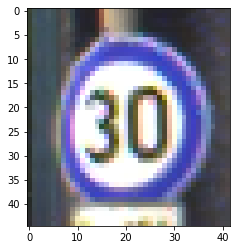

In [20]:
img = cv2.imread("/content/drive/MyDrive/pic/test1/test/00001.png")
plt.imshow(img)

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

tes1 = ImageDataGenerator( rescale = 1.0/255. )
test_dat3 = tes1.flow_from_directory('/content/drive/MyDrive/pic/test1', batch_size=20, class_mode='categorical', target_size=(30, 30))
y_pre = model.predict(test_dat3)
print((y_pre)*100)

Found 1 images belonging to 1 classes.
[[2.1033591e-25 1.0000000e+02 1.0455086e-33 3.1090053e-23 3.4027997e-27
  1.4007124e-24 3.9956045e-24 3.3537936e-25 8.3316854e-24 9.4159948e-26
  1.3249247e-23 4.0179247e-29 1.2245259e-26 2.1609060e-34 1.2847287e-24
  1.8047918e-23 7.8449166e-32 4.0673878e-26 3.6333959e-30 7.0260300e-23
  3.6579408e-23 1.9191545e-23 4.9422128e-27 1.4606400e-30 2.8806911e-26
  1.4165849e-25 2.0488775e-22 1.6245264e-24 5.7723212e-21 6.3429463e-28
  2.8680252e-27 6.8404243e-24 5.7456181e-25 9.0963482e-23 4.5423570e-22
  2.8348374e-28 8.2124904e-27 4.1589314e-29 2.7696586e-25 2.9948430e-16
  2.9424468e-23 9.0741976e-24 2.7933951e-32]]


모델을 보면 1번 클래스에서 100퍼센트 정답이라고 확신하고 있습니다. 1번 클래스를 확인해보겠습니다.

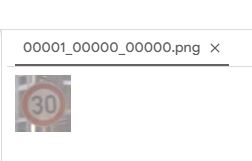

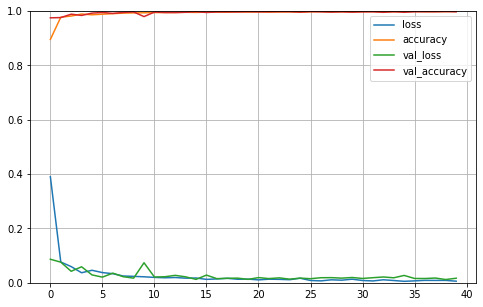

In [26]:
import pandas as pd

pd.DataFrame(model1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()